# Walkable Cities
DS4A Empowerment Cohort 4 Team 27: Sola Agogu | Daniel Bernal | Omar Ibarra | Chanel Lee | Dami Salami

## Introduction
Most American cities are designed for cars instead of people. With over 2 million people injured in car accidents every year and 14% of greenhouse gas emissions coming from cars, policy makers are considering if is time for the US to move away from car-focused
culture. As more cities move toward walkability, we are closer to a solution for curbing car-centrism in the US. From prioritizing pedestrian safety to public transportation, we will explore the effects of people-first city design.
Pedestrian-focused, walkable cities invest in the community. They not only reduce car use, they improve local economies, reduce obesity and diabetes rates, and more. We will investigate how walkable cities can contribute to a better quality of life for people, and compare walkable cities to car-centric cities that treat pedestrians as an
afterthought.
We will explore what makes a city walkable by considering pedestrian-centric designs, public transportation, and city ordinances. 
We will also compare walkable cities to car-centric cities on quality of life factors. We then aim to answer the following question: What quality of life factors are higher in walkable cities?


## Business Impact
This project is meant to encourage city planners and local governments to invest in walkability and implement pedestrian-centric city designs. We hypothesize that walkable cities lead to an improvement in the quality of life for its residents and increase the local economy. We hope to inspire residents to ask their local government to help shape the future of our country’s infrastructure and health by bringing walkability to their city.

*****************************************************
** Include research on any other studies on this and approaches of the solutions to the main question. Provide references!

## Approach

***** EDIT: A number of studies have been done by researchers and students world-wide about the possibility of improving sustainability by building more walkable cities including ****, ******** and ** (references). Urban planning articles like (reference) extol the common sense benefits of walkable cities on the environment. As with most other facets of life, human beings tend to care about topics when they understand the specific benefits to them.
Our approach to demonstrating this included regression analysis, and modeling to determine if there are any differences in quality of life between walkable and non-walkable cities. 





## Data Analysis & Computation

### Datasets
 Several American Community Survey datasets were obtained with 2021 estimates for different types of variables. These were valuable because they contained information at the city level.
 - Demographic variables including age, sex, education (***REFERENCE***)
 - Health variables including population percentages with diabetes, high blood pressure, obesity (***REFERENCE***)
 - Other quality of life health variables including sleep, depression, crime, and how often members of the population go for medical checkups (***REFERENCE***)
 Walkability variables including cities' walk scores and bike scores were obtained by web scraping the *** site (*REFERENCE*)


 ### Data Cleaning and Wrangling
 Our challenge was not just figuring out how to gather sufficient data, but also figuring out how to eliminate some of the 100+ variables from the ACS and EPA data sources.
 Doing this while maintaining the integrity of our dataset required extensive data cleaning and wrangling:
 - Using the python pandas library, we dropped repeated variables, columns that included annotations alone, and variables that were considered irrelevant to investigating our hypothesis like the emissions from power plants and other industries. 
 - We also standardized the column names to aid in the readability of the data (S0101_15E became public_transportation, for example). 
 - Unfortunately, the data cleaning and wrangling process also included getting rid of information with the wrong granularity, like EPA vehicle emissions data which was only available down to the State level. 
 
 This section was by far the most time-consuming and took several rounds of refining until we had an appropriate dataset.

### Edit Exploratory Data Analysis 

In carrying out an exploratory analysis of our data, we found encouraging signs that there were some correlations between our walkability variables and our quality of life variables. 

******Below is a geographic bubble plot of city walkability vs ** (or other bivariate/multivariate visualization)
******And below is our standardized data using SciKit Learn's StandardScaler 


include most meaningful data visualizations AND derived conclusions/remarkable hypothesis - use submitted extended analysis


#### 1. Data review
#### 2. Summary Statistics
#### 3. Scatterplots and other univariate distributions
#### 4. Heat Maps (Correlations)

### Statistical Analysis & Predictive Modeling

5. Hypothesis Testing
focus on why twe made the choices we made
6. Regression Analysis/ Modeling
model implications and validity

## Description of Dashboard

### Use Case

### Data Engineering

### Flow charts/diagrams to show MODELING METHODS TRIED AND REASONS THEY WERE CHOSEN

## Conclusions and Future Work

Includes caveats about potentially non-represenattive sample size!

My city and me app 

Below are analytical steps taken to make sense of our data from EDA to regression modeling

In [15]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels.formula.api  as smf
#import hvplot.pandas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pingouin                 as pg
import statsmodels.formula.api  as sm
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from scipy.stats import f_oneway


In [16]:
# import wrangled dataset
walkable_cities = pd.read_csv("data_sources/walkable-cities.csv")
#Summary Statistics Table
walkable_cities.describe()

,place_code,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
count,760.000000,7.600000e+02,7.560000e+02,756.000000,756.000000,564.000000,564.000000,564.000000,755.000000,755.000000,...,563.000000,563.000000,564.000000,564.000000,727.000000,564.000000,518.000000,681.000000,633.000000,633.000000
mean,42201.003947,1.646429e+05,2.451419e+06,135.344888,1589.308126,36.554787,0.492196,0.508244,0.530158,0.136474,...,0.382859,97922.424512,37995.865248,73858.675532,38843.456671,0.135641,6.892085,47.157122,0.004210,0.025443
std,24175.783004,3.924743e+05,1.704521e+06,186.608511,1505.860211,4.354124,0.018344,0.017905,0.195627,0.153452,...,0.049541,33448.610008,13202.716289,26481.199768,6538.581192,0.061697,2.587433,17.362578,0.003196,0.012229
min,0.000000,5.010400e+04,1.030760e+05,3.238030,93.047234,22.800000,0.427906,0.342966,0.025274,0.002961,...,0.245462,49626.000000,17236.000000,32217.000000,29353.000000,0.017209,1.300000,15.000000,0.000298,0.005378
25%,21000.000000,6.490600e+04,6.745655e+05,49.981347,797.451711,33.900000,0.480277,0.497261,0.398436,0.030277,...,0.352608,75498.000000,28768.500000,55021.250000,34211.500000,0.087817,5.100000,38.000000,0.001950,0.016792
50%,42910.000000,8.838150e+04,2.048412e+06,83.929773,1179.498942,36.550000,0.492517,0.508403,0.535662,0.076221,...,0.388017,89800.000000,35076.000000,67973.500000,37075.000000,0.129836,6.700000,42.000000,0.003531,0.023194
75%,62091.000000,1.378420e+05,4.012588e+06,142.740369,1820.268367,39.000000,0.503238,0.519734,0.689173,0.188963,...,0.417305,112246.500000,43269.250000,86506.000000,42241.000000,0.173281,8.300000,49.000000,0.005670,0.032411
max,88940.000000,8.467513e+06,5.613900e+06,1935.461994,19691.366525,51.000000,0.657102,0.571949,0.877240,0.912617,...,0.516764,268748.000000,102537.000000,205219.000000,64090.000000,0.421409,17.400000,122.000000,0.020618,0.086487


In [ ]:
hist_walk = walkable_cities['walk_score']
# Plot a histogram of the "walk_score" column
sns.displot(hist_walk, kde=False)

In [ ]:
# First, create a scatter plot matrix
scatter_matrix = pd.plotting.scatter_matrix(walkable_cities, figsize=(20, 20))

# Rotate the x-axis labels on the scatter plot matrix
[s.xaxis.label.set_rotation(45) for s in scatter_matrix.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in scatter_matrix.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in scatter_matrix.reshape(-1)]

# Set the labels for the x-axis and y-axis
[s.xaxis.set_label_text(col) for col, s in zip(walkable_cities.columns, scatter_matrix.reshape(-1))]
[s.yaxis.set_label_text(col) for col, s in zip(walkable_cities.columns, scatter_matrix.reshape(-1))]

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

In [ ]:
#Heat Maps
# Create a list only with the features needed
walkable_values = ['walk_score', 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes']
# Create a pivot table with the "city" column as the index and the "walk_score" column as the values
walkable_pivot_table = walkable_cities.pivot_table(index="city", values=walkable_values)

fig, ax = plt.subplots(figsize=(20, 50))
# Create a heatmap of the pivot table
sns.heatmap(walkable_pivot_table, cmap="coolwarm", ax=ax)

# Show the plot
plt.show()

In [ ]:
#Group the cities in a dataframe by the "walk_score" column and create a heat map

# Create a new column with the "walk_score" values binned into ranges of 10
walkable_cities["walk_score_range"] = pd.cut(walkable_cities["walk_score"], bins=range(0, 110, 10))

# Create a pivot table with the "city" column as the index and the "walk_score_range" column as the values
walkable_pivot_table_1  = walkable_cities.pivot_table(index="city", values="walk_score_range")

# Create a heatmap of the pivot table
sns.heatmap(walkable_pivot_table_1)

# Show the plot
plt.show()

In [ ]:
# Correlations

top_neg_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
top_pos_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]
top_neg_corr_bike = walkable_cities.corr()['bike_score'].sort_values(ascending = True)[1:11]
top_pos_corr_bike = walkable_cities.corr()['bike_score'].sort_values(ascending = False)[1:11]

top_neg_corr_walk, top_pos_corr_walk,top_neg_corr_bike, top_pos_corr_bike,

## Regression Analysis and Modeling

#### Hypothesis Testing

The premise of our problem is that a set of variables (features) are significantly different between walkable and non-walkable cities.

Here are our hypotheses:
* H0 = null_hypothesis = "There is no relationship between walk_score and the independent variables"
* HA = alternate_hypothesis = "There is a relationship between walk_score and the independent variables"

In [17]:
# Hypothesis Testing and model

# Create a multiple linear regression model with the dependent variable and the independent variables
model = smf.ols('walk_score ~ bike_score + chd + obesity + bphigh + highchol + diabetes', data=walkable_cities).fit()

# Dependent variable - 'walk_score'
# Independent variables - 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes'

# Print the summary of the model
print(model.summary())

# Define the null and alternate hypotheses
null_hypothesis = "There is no relationship between walk_score and the independent variables"
alternate_hypothesis = "There is a relationship between walk_score and the independent variables"

# Perform the F-test
f_test = model.f_test(np.identity(len(model.params)))

# Print the p-value of the F-test
print(f"p-value = {f_test.pvalue:.4f}")

# Interpret the results
if f_test.pvalue < 0.05:
    print("Reject the null hypothesis")
    print(alternate_hypothesis)
else:
    print("Fail to reject the null hypothesis")
    print(null_hypothesis)

                            OLS Regression Results                            
Dep. Variable:             walk_score   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     106.9
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           1.39e-95
Time:                        23:29:08   Log-Likelihood:                -2717.8
No. Observations:                 711   AIC:                             5450.
Df Residuals:                     704   BIC:                             5482.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4468      7.285      3.218      0.0

Note the strong multicolinearity which could indicate the model is unsuitable and lead us to try other modeling methods. First let's check similar ordinary linear regression on all possible combination of our independent variables and dependent variable. This next section performs the above on all combinations of our variables:

In [18]:
#Fix!! Not able to troubleshoot :( 

from itertools import combinations
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# define variables
"""
x = np.array(walkable_cities[['pop_per_km2', 'median_age', 'male',
       'female',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_commute',
       'work_from_home', 'households', 'mean_household_income', 'mean_income',
       'median_household_income', 'living_wage', 'poverty',
       'unemployment_rate', 'median_aqi', 'violent_crime', 'property_crime']])
"""
x = walkable_cities[['pop_per_km2', 'median_age', 'male',
       'female',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_commute',
       'work_from_home', 'households', 'mean_household_income', 'mean_income',
       'median_household_income', 'living_wage', 'poverty',
       'unemployment_rate', 'median_aqi', 'violent_crime', 'property_crime']].values

y = np.array(walkable_cities['walk_score'])

# create a list of all possible variable combinations
combinations_list = list(combinations(['pop_per_km2', 'median_age', 'male',
       'female',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_commute',
       'work_from_home', 'households', 'mean_household_income', 'mean_income',
       'median_household_income', 'living_wage', 'poverty',
       'unemployment_rate', 'median_aqi', 'violent_crime', 'property_crime'], 2))

# loop through the list of combinations
for combination in combinations_list:
    # select the variables for this iteration
    ##################### IndexError: tuple index out of range
    var_indices = [np.where(x == var)[1][0] for var in combination]
    x_temp = x[:, [np.where(x.columns == var)[0][0] for var in combination]]


    # fit the model
    model = LinearRegression().fit(x_temp, y)
    
    # calculate the R-squared
    r2 = r2_score(y, model.predict(x_temp))
    
    # print the combination and the R-squared
    print(combination, r2)


C:\Users\tayoj\AppData\Local\Temp\ipykernel_19028\4254370858.py:53: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



IndexError: tuple index out of range

#### Lasso Regression
To identify the top variables (features) that contribute to a city's walk score from our dataset, we had options to use any feature selection technique like random forest or linear regression with L1 regularization (Lasso regression) to identify the key factors that contribute to a city's walk score in Python using the scikit-learn library.

The top features that contributed to a city's walk score change everytime code is run because the train_test_split function shuffles the data before splitting it into train and test sets. This means that the training and test sets will be different every time the code is run, which will result in different model coefficients and different feature importances). Here were the top coefficients from one of the runs:
* phealth: Physical health not good for >=14 days among adults aged >=18 years NEG
* casthma: Current asthma among adults aged >=18 years POS
* csmoking: Current smoking among adults aged >=18 years NEG
* bike commute NEG
* teethlost: All teeth lost among adults aged >=65 years POS
* binge: Binge drinking among adults aged >=18 years POS
* lpa: No leisure-time physical activity among adults aged >=18 years POS

The feature importances being different every time the code is run suggests that the model is not stable and that the importance of the features is sensitive to the specific training and test sets that are used.

In [24]:
# Lasso regression Code 
# Import the necessary libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# New data frame with all numeric features
walkable_cities_2 = walkable_cities[['pop_estimate_2021',
       'land_area_sqkm', 'pop_per_km2', 'median_age', 'male', 'female',
       'white_alone', 'black_or_african_american_alone',
       'american_indian_and_alaska_native_alone', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander_alone',
       'some_other_race_alone', 'two_or_more_races', 'hispanic_or_latino',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'walk_score', 'bike_score', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_commute',
       'work_from_home', 'households', 'mean_household_income', 'mean_income',
       'median_household_income', 'living_wage', 'poverty',
       'unemployment_rate', 'median_aqi', 'violent_crime', 'property_crime']]

# drop missing values
walkable_cities_3 = walkable_cities_2.dropna()

# Split the data into input features (X) and the target variable (y)
X = walkable_cities_3.drop(columns='walk_score')
y = walkable_cities_3['walk_score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Remove missing values from the training and test sets
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# Remove missing values from the target variable
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

# Create an imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training set
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test set
X_test_imputed = imputer.transform(X_test)

# Next, create an instance of the Lasso model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train_imputed, y_train)

# Use the model to make predictions on the test data
y_pred = lasso.predict(X_test_imputed)

# Pair the feature names with their coefficients
feature_coefs = zip(X_train.columns, lasso.coef_)

# Sort the feature_coefs list by the absolute value of the coefficients in descending order
sorted_coefs = sorted(feature_coefs, key=lambda x: abs(x[1]), reverse=True)

# Print the sorted list of feature and coefficient
for feature, coef in sorted_coefs:
    print(feature, coef)

# The lasso model has a "coef_" attribute that contains the coefficients of the features in the model
# Features with a coefficient of 0 were eliminated from the model as they are not important
# This will print the feature names and their corresponding coefficients, sorted by the absolute value of the coefficients in descending order. 
# The features with the highest absolute coefficient values will be at the top of the list, indicating that they are the most important features in the model.



hispanic_or_latino 4.256697006233454
bike_commute -1.9078574505345087
casthma 1.4969643760943299
copd -0.8174610004637515
binge 0.7875682763834982
csmoking -0.6516019705619308
walk_commute 0.597141283402402
access2 -0.5509370190834868
ghlth 0.5198757562886352
mammouse 0.4522042066250295
bphigh -0.3988868050719803
bike_score 0.3803195911854253
dental -0.28856729635501394
colon_screen -0.2798189015510251
unemployment_rate 0.27136701771781446
median_age 0.2541777066699612
sleep 0.25035383072959094
lpa 0.24090282441175367
depression 0.24089887642908203
checkup 0.2363027678424902
cervical -0.22731408705627018
bpmed 0.21327143683635919
cholscreen -0.20464520477752288
arthritis 0.14293129538796556
corem 0.13339607288698765
corew -0.11777966637146198
phlth -0.08271502813199848
highchol -0.07538770542433963
obesity 0.07296394017620372
drive_commute -0.056706873145002425
median_aqi -0.052401178005120154
pop_per_km2 0.005715105518226339
land_area_sqkm -0.005150683549740758
median_household_income

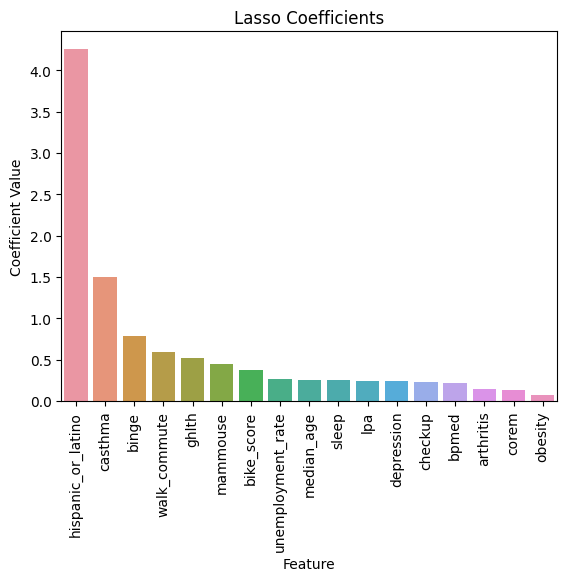

In [25]:
import seaborn as sns

# Pair the feature names with their coefficients
feature_coefs = zip(X_train.columns, lasso.coef_)

# Sort the feature_coefs list by the absolute value of the coefficients in descending order
sorted_coefs = sorted(feature_coefs, key=lambda x: abs(x[1]), reverse=True)

# Filter the list to only include features with non-zero coefficients
non_zero_coefs = [(f,c) for f,c in sorted_coefs if c > 0.05]

# Extract the feature names and coefficients
feature_names = [f[0] for f in non_zero_coefs]
coefficients = [f[1] for f in non_zero_coefs]

# Create the bar chart
sns.barplot(x=feature_names, y=coefficients)
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficients")
plt.xticks(rotation=90)
plt.show()


#### Random Forest Model

This model appears to be much more stable than the lasso regression model. 



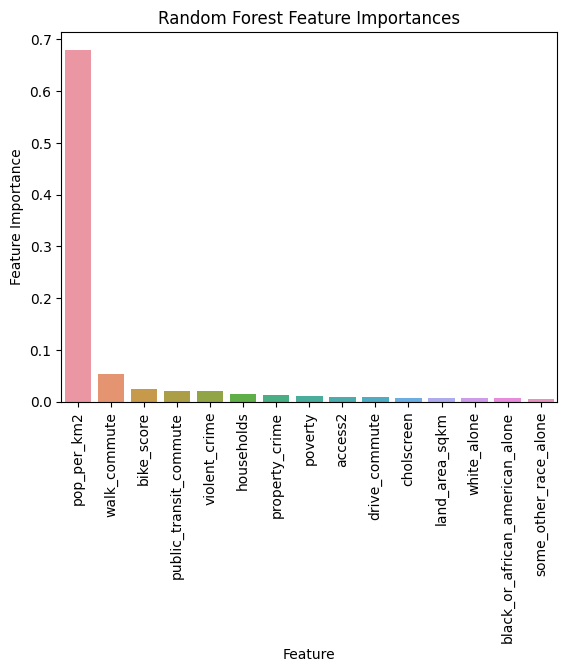

In [33]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
rf.fit(X_train_imputed, y_train)

# Extract the feature importances
importances = rf.feature_importances_

# Pair the feature names with their importances
feature_importances = zip(X_train.columns, importances)

# Sort the feature importances list by the feature importances in descending order
sorted_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Filter the feature importances to only include feature with importances greater than 0
filtered_importances = [(f,c) for f,c in sorted_importances if c > 0.005]

# Extract the feature names and importances
feature_names = [f[0] for f in filtered_importances]
importances = [f[1] for f in filtered_importances]

# Create the bar chart
sns.barplot(x=feature_names, y=importances)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.xticks(rotation=90)
plt.show()


#### Ridge model with RFE and cross validation



In [1]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Create a dictionary of the hyperparameters to tune
param_grid = {'alpha': [0.1, 1, 10]}

# Create an instance of the Ridge model
ridge = Ridge()

# Create an RFE object and specify the number of features to keep
rfe = RFE(ridge, n_features_to_select=10)

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)

# Get the selected features
rfe.fit(grid_search.best_estimator_.fit_transform(X, y), y)

# Print the indices of the selected features
print(rfe.support_)

# Print the ranking of the features
print(rfe.ranking_)


"""
In this example, we first create a dictionary of the hyperparameters to tune (in this case, alpha). Then, we create an instance of the Ridge model. We create an RFE object and specify the number of features to keep (in this case, 10). Then, we create a GridSearchCV object, which takes the Ridge model, the hyperparameters to tune, and the number of folds for cross-validation (in this case, 5) as inputs.

The grid search object will train the model with different values of alpha, and it will use cross-validation to evaluate the performance of each model. It will then return the best set of hyperparameters (in this case, the best value of alpha) and the best score.

Then, we get the selected features by fitting the RFE object to the data transformed by the best_estimator_ attribute of the grid_search object. Finally, we print the indices of the selected features and the ranking of the features.

It's important to note that, as before, you should use cross-validation when tuning the hyperparameter alpha to find the best value for the specific dataset and avoid overfitting.

"""


NameError: name 'X' is not defined

#### Linear Regression

In [ ]:
from itertools import combinations
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# define variables
"""
x = np.array(walkable_cities[['pop_per_km2', 'median_age', 'male',
       'female',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_commute',
       'work_from_home', 'households', 'mean_household_income', 'mean_income',
       'median_household_income', 'living_wage', 'poverty',
       'unemployment_rate', 'median_aqi', 'violent_crime', 'property_crime']])
"""
x = walkable_cities[['pop_per_km2', 'median_age', 'male',
       'female',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_commute',
       'work_from_home', 'households', 'mean_household_income', 'mean_income',
       'median_household_income', 'living_wage', 'poverty',
       'unemployment_rate', 'median_aqi', 'violent_crime', 'property_crime']].values

y = np.array(walkable_cities['walk_score'])

# create a list of all possible variable combinations
combinations_list = list(combinations(['pop_per_km2', 'median_age', 'male',
       'female',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_commute',
       'work_from_home', 'households', 'mean_household_income', 'mean_income',
       'median_household_income', 'living_wage', 'poverty',
       'unemployment_rate', 'median_aqi', 'violent_crime', 'property_crime'], 2))

# loop through the list of combinations
for combination in combinations_list:
    # select the variables for this iteration
    var_indices = [np.where(x == var)[1][0] for var in combination]
    x_temp = x[:, [np.where(x.columns == var)[0][0] for var in combination]]


    
    # fit the model
    model = LinearRegression().fit(x_temp, y)
    
    # calculate the R-squared
    r2 = r2_score(y, model.predict(x_temp))
    
    # print the combination and the R-squared
    print(combination, r2)



C:\Users\tayoj\AppData\Local\Temp\ipykernel_19028\4254370858.py:53: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



IndexError: tuple index out of range

#### Predictive Modeling: Notes from Pandas Modeling: 

So far, the modeling methods we've used highlight the concepts of independent and dependent variables, and correlation and multicollinearity. 

We do have to consider random noise and often unknown or hidden factors that affect the behavior of the dependent variable but may not be fully represented in the independent variables. 

We would like to not only build good models but also be able to understand the expected performance (such as the accuracy) of
predictions we will make in the future.
Noise and missing information notwithstanding, in many cases, it is possible to fit a model that essentially memorizes the data and provides very accurate values of the dependent variable for each instance in our data. 

The basic concept of how to address this is to fit the model on only some of the available data and hold some data back as a test of model performance. 

The process of iteratively finding the best coefficients is called training the model, and it's common to read about models learning from the data.

We use the predictive modeling interface provided by sklearn. 

We first set a random seed (27 in our case), then we create three arrays – the first, called train, randomly samples 70 percent of the index values for walkable_cities, the second, called validation, randomly samples 70 percent, and the third called test contains the other values. In the code here, X_train and y_train are then created using the train array. We use
the.random.choice() numpy method to get the 70% split and then simply pick the
index values that are not in train for the validation split.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# split the data into train and val sets
train_X, val_X, train_y, val_y = \
    train_test_split(walkable_cities_3.drop(columns = 'walk_score'), 
                     walkable_cities_3['walk_score'],
                     train_size = 0.7,
                     test_size = 0.2,
                     random_state = 27)

# calculate the number of rows in the test set
test_size = int(walkable_cities_3.shape[0] * 0.1)

# Create test set
test_X, test_y, _, _ = train_test_split(val_X, val_y, test_size=test_size, random_state=27)

# verify the split ratios
print(f'train set is {train_X.shape[0] / walkable_cities_3.shape[0]:.2%}\n',
      f'val set is {val_X.shape[0] / walkable_cities_3.shape[0]:.2%}\n',
      f'test set is {test_X.shape[0] / walkable_cities_3.shape[0]:.2%}')


train set is 70.00%
 val set is 20.00%
 test set is 10.00%


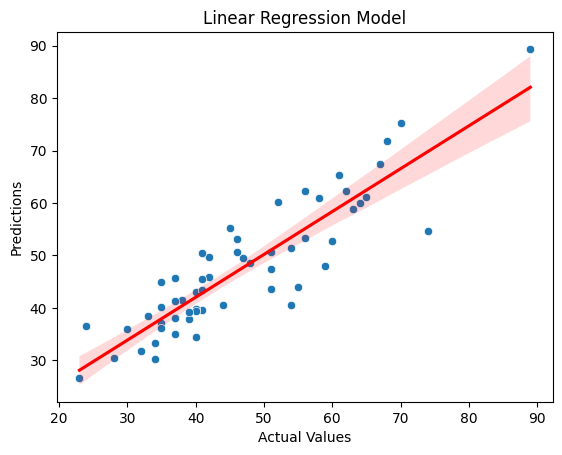

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of the predictions and actual values
sns.scatterplot(x=y_test, y=y_pred)

# Add a line of best fit
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

# Add labels and a title
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model')

# Show the plot
plt.show()


In [37]:
from sklearn.impute import SimpleImputer

# Create an imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training set
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test set
X_test_imputed = imputer.transform(X_test)

# Scale and normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the model
reg = LinearRegression()

# Train the model on the training set
reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test_scaled)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared value: {:.2f}".format(r2))

"""
This code is handling missing values, normalizing the data, and training a linear regression model to make predictions on a test set.

First, it imports the SimpleImputer class from the sklearn library, which is a simple imputer for handling missing values.

Then, it creates an imputer object with the strategy 'mean', which means that the imputer will replace missing values with the mean of the feature.

It then uses the fit_transform() method to fit the imputer on the training set (X_train) and transform the training set by replacing the missing values with the mean. The transformed data is stored in the X_train_imputed variable.

It then uses the transform() method to transform the test set (X_test) by replacing the missing values with the mean. The transformed data is stored in the X_test_imputed variable.

Next, it uses the StandardScaler class from the sklearn library, which is a class that standardizes the features by subtracting the mean and dividing by the standard deviation. It creates a scaler object and use fit_transform() method to scale and normalize the training set, storing the result in the X_train_scaled variable. Then it uses the transform() method to scale and normalize the test set, storing the result in the X_test_scaled variable.

Then, it initializes a LinearRegression model from the sklearn library, and trains the model on the scaled and normalized training set (X_train_scaled) and the target variable (y_train) by using the fit() method.

Then, it makes predictions on the scaled and normalized test set (X_test_scaled) using the predict() method and stores the predictions in the y_pred variable.

It then calculates the mean squared error(MSE) and the R-squared value of the predictions using the mean_squared_error() and the r2_score() functions from the sklearn.metrics library.

"""

Mean Squared Error: 36.13
R-squared value: 0.80


In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the predictions and actual values
plt.scatter(y_test, y_pred)

# Add a line of best fit
plt.plot(y_test, y_test, color='red')

# Add labels and a title
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model')

# Show the plot
plt.show()


"""
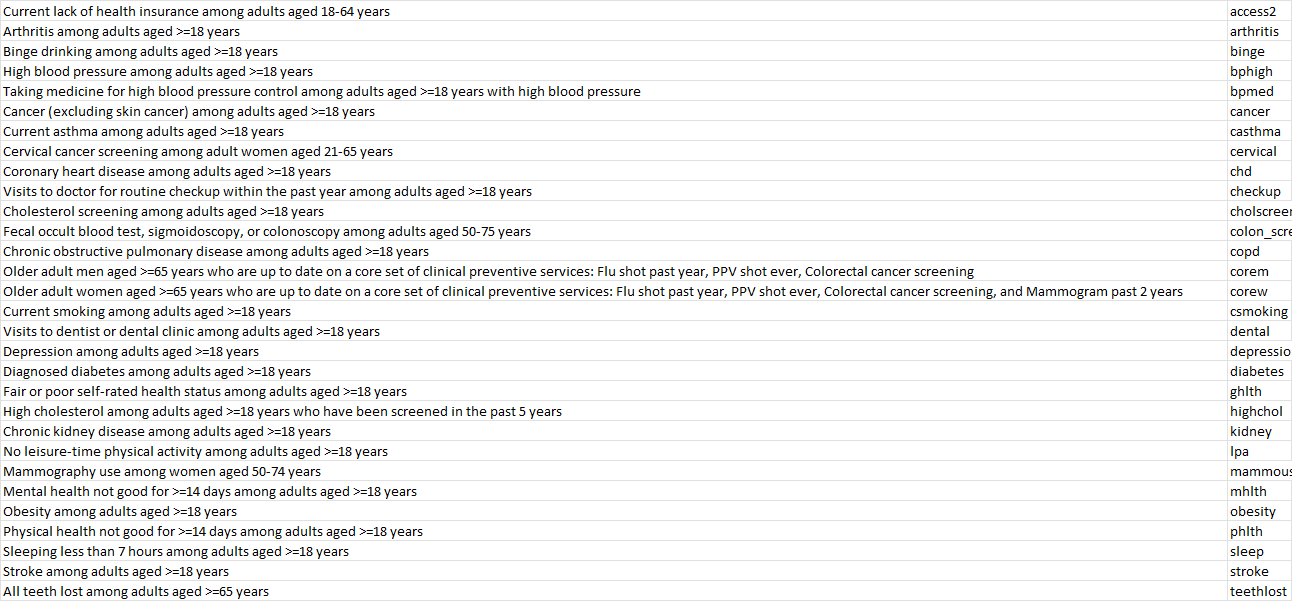